In [1]:
import numpy as np
import glob as gb
import photonics.fluorescence as fl
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
# Print info.txt file
f = open("./Lifetime/secondAttempt/info.txt","r")
contents = f.read()
f.close()

for row in contents.split("\n"):
    print(row)

0.4a 1ms pump, 100ms period. 8Hz. 250 sweeps. 0.23W.


In [3]:
# select files to analyse
files = gb.glob('./Lifetime/secondAttempt/*.txt')

# Select only T12 and T13
files = [x for x in files if '12' in x or '13' in x]
files

['./Lifetime/secondAttempt\\t12_CanolaOil.txt',
 './Lifetime/secondAttempt\\t12_air.txt',
 './Lifetime/secondAttempt\\t13_CanolaOil.txt',
 './Lifetime/secondAttempt\\t13_air.txt']

In [4]:
# Select the required pump
pump = 1
lamp_delay = 0.1

A_1             tau_1        A_2            tau_2        C                Chisq
--------------  -----------  -------------  -----------  -------------  -------
331.67 ± 10.57  0.89 ± 0.06  976.55 ± 7.57  8.13 ± 0.07  689.03 ± 0.57    1.067


<IPython.core.display.Javascript object>


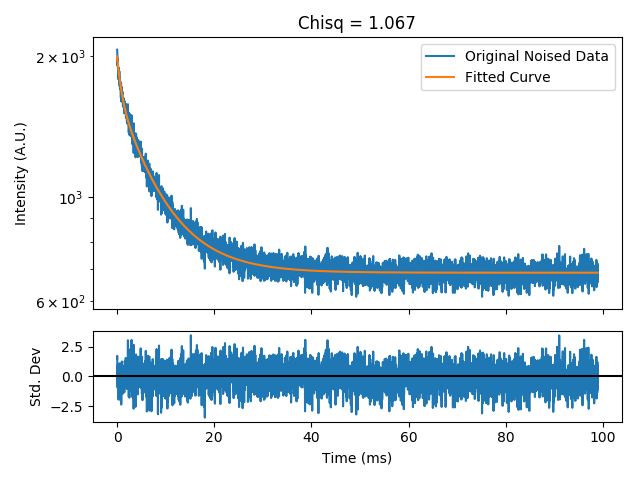

In [5]:
# sample = '13_air'
sample = 't13_CanolaOil'
f =  [x for x in files if sample in x]

data = np.genfromtxt(fname=f[0], delimiter=',', dtype=float, skip_header=10, usecols=(0,1))
x = data[:,0]/1E6  # Convert time from us to ms
y = data[:,1]

x = fl.shift_time(x, length=pump+lamp_delay)
x, y = fl.reject_time(x, y, reject_start=0, reject_end=0)
popt, perr, chisq = fl.fit_decay2(x, y)
fig = fl.plot_decay(x, y, fl.decay_fn2, popt, log=True, norm=False)